In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import math

In [2]:
with open("data.json") as f:
    all_data = json.load(f)

all_data.keys()

dict_keys(['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'])

In [3]:
example_df = pd.DataFrame.from_records(all_data["2013"])
example_df

,ranking_number,name,number_of_games,win,draw,lose,goals,goals_conceded,goals_diff,points
0,1,Bayern,34,29,4,1,98,18,80,91
1,2,Dortmund,34,19,9,6,81,42,39,66
2,3,Leverkusen,34,19,8,7,65,39,26,65
3,4,Schalke,34,16,7,11,58,50,8,55
4,5,Freiburg,34,14,9,11,45,40,5,51
5,6,Frankfurt,34,14,9,11,49,46,3,51
6,7,Hamburg,34,14,6,14,42,53,-11,48
7,8,M'gladbach,34,12,11,11,45,49,-4,47
8,9,Hannover,34,13,6,15,60,62,-2,45
9,10,Nürnberg,34,11,11,12,39,47,-8,44


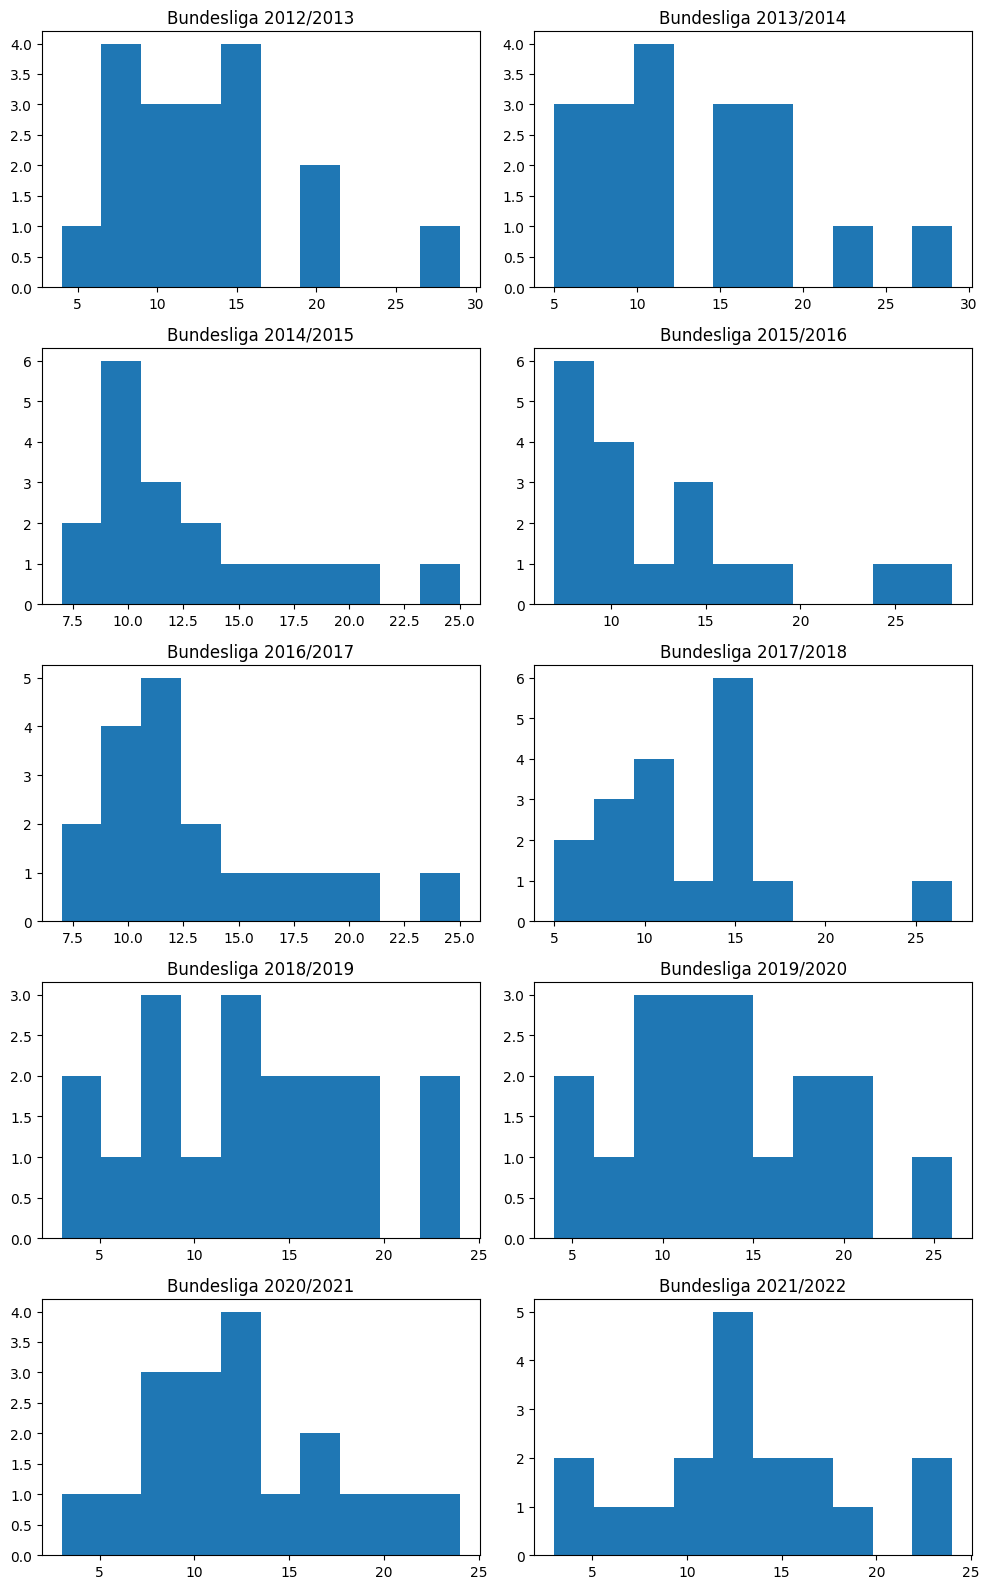

In [4]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(10, 16))

year = 2013
for i in range(5):
    for j in range(2):
        df = pd.DataFrame.from_records(all_data[str(year)])
        axs[i][j].hist(df["win"])
        axs[i][j].set_title(f"Bundesliga {year-1}/{year}")
        year += 1

plt.tight_layout()

In [5]:
results = []
for year, data in all_data.items():
    df = pd.DataFrame.from_records(data)
    mean_sample = 1/(len(df)-1) * df["win"].sum() 
    std_sample = math.sqrt(1/(len(df)-1) * ((df["win"]-mean_sample)**2).sum())
    df["z_factor"] = (df["win"]-mean_sample) / std_sample
    
    z_factor_bayern = df.query("name == 'Bayern'")["z_factor"].at[0]
    results.append((year, z_factor_bayern))

results = pd.DataFrame(results, columns=["year", "z_factor"])
results

,year,z_factor
0,2013,2.706354
1,2014,2.321395
2,2015,2.350671
3,2016,2.488834
4,2017,2.466644
5,2018,2.669226
6,2019,1.739467
7,2020,2.087073
8,2021,2.059962
9,2022,1.869604


> Als erste deutsche Mannschaft erreichte der FC Bayern München in der Saison 2012/13 mit dem Gewinn der deutschen Meisterschaft, des Pokals und der Champions League ein Triple; der Verein wiederholte diesen Erfolg in der Saison 2019/20. - Wikipedia